## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
# read in the data
iris = datasets.load_iris()

# split datas into train and test sets
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.25, random_state = 4)

# construct the model and train the model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# prediction and evaluate
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',acc)


Accuracy:  0.9736842105263158


In [3]:
# read in the data
iris = datasets.load_iris()

# split datas into train and test sets
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.25, random_state = 4)

# change the parameters
clf1 = DecisionTreeClassifier(
        criterion = 'entropy',
        splitter = 'random',
        max_depth = None,
        min_samples_split = 2,
        min_samples_leaf = 1,
)
clf1.fit(x_train, y_train)
y_pred1 = clf1.predict(x_test)
acc1 = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',acc1)

Accuracy:  0.9736842105263158


### wine data:


In [4]:
# read in the data
wine = datasets.load_wine()

# split datas into train and test sets
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.25, random_state = 4)

# construct the model and train the model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# prediction and evaluate
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',acc)

Accuracy:  0.9111111111111111


In [5]:
wine = datasets.load_wine()

# split datas into train and test sets
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.25, random_state = 4)
# change the parameters
clf1 = DecisionTreeClassifier(
        criterion = 'entropy',
        splitter = 'random',
        max_depth = 10,
        min_samples_split = 2,
        min_samples_leaf = 1,
)
clf1.fit(x_train, y_train)
y_pred1 = clf1.predict(x_test)
acc1 = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',acc1)

Accuracy:  0.9111111111111111


### boston datas

In [6]:
# read in the data
boston = datasets.load_boston()

# split datas into train and test sets
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.25, random_state = 4)

# construct the model and train the model
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)

# prediction and evaluate
y_pred = reg.predict(x_test)

# acc = metrics.accuracy_score(y_test, y_pred)
# print('Accuracy: ',acc)

In [7]:
acc = reg.score(x_test, y_test)
print('Accuracy: ',acc)

Accuracy:  0.7055835264839493


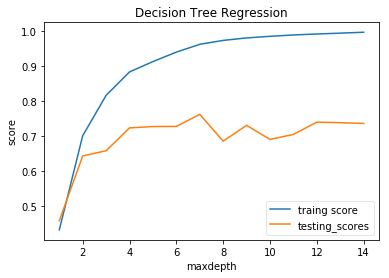

In [11]:
# try with different depth
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import  matplotlib.pyplot as plt

def test_DecisionTreeRegressor_depth(*data,maxdepth):
    X_train, X_test, y_train, y_test = data
    depths = np.arange(1,maxdepth)
    training_scores = []
    testing_scores = []
    for depth in depths:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    #绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label='traing score')
    ax.plot(depths,testing_scores,label='testing_scores')
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.25, random_state = 4)
test_DecisionTreeRegressor_depth(X_train, X_test, y_train, y_test,maxdepth=15)
# --------------------- 
# 作者：Jack_丁明 
# 来源：CSDN 
# 原文：https://blog.csdn.net/dingming001/article/details/80686405 
# 版权声明：本文为博主原创文章，转载请附上博文链接！
